In [90]:
import pandas as pd
import numpy as np
from math import ceil

In [161]:
data = pd.read_csv("winequalityN.csv")

In [92]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Сразу же чекним наши данные на Nan

In [94]:
data.isna().sum().sum()

38

38 относительно 6497 довольно мало, значит просто выкенем обьекты с Nan

In [162]:
data = data.dropna()

In [163]:
features = data.columns[:-1]
target = data.columns[-1]

Ну по заветам Шевниной начинаем первый этап, это визуализация данных гистограммы все дела

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

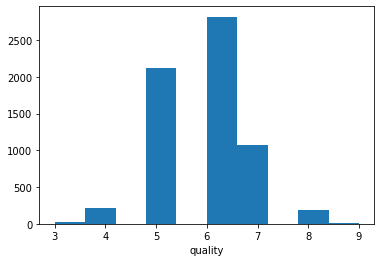

In [98]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data[target])
ax.set(xlabel='quality')
None

Как же мало обьектов 3го качества и 9го в разбиении на трейн и тест надо будет учесть

In [99]:
print(data[data[target]==3].shape,data[data[target]==9].shape)

(30, 13) (5, 13)


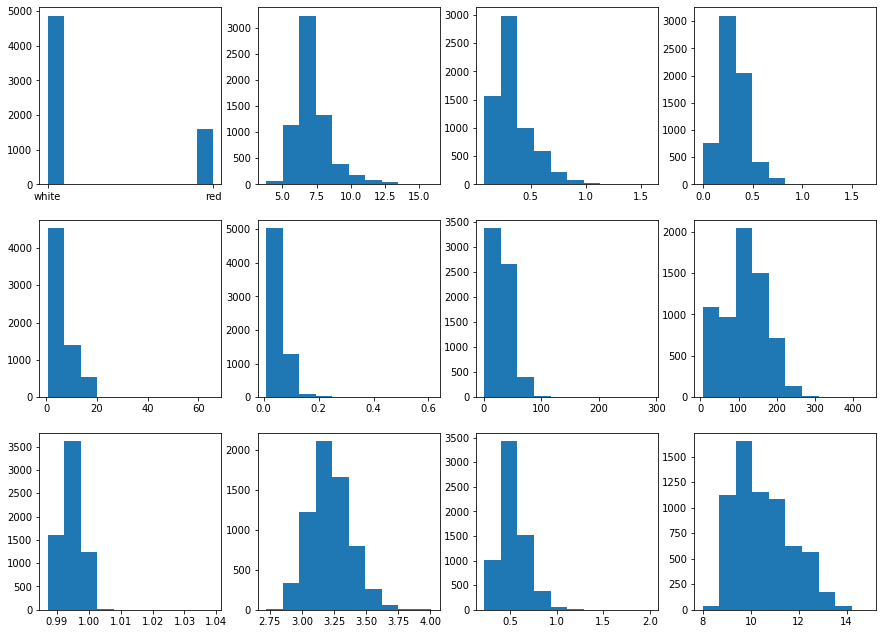

In [100]:
n=ceil(np.sqrt(len(list(features))))
fig=plt.figure(figsize=(15,15))
for ind,col in enumerate(features):
    ax=fig.add_subplot(n,n,ind+1)
    ax.hist(data[col])
    

Да вродебы шикарные данные, видимо тут что то простое совсем придется обучать

Наш следующий этап - будем исследовать зависимости между признаками и отбирать те, что нужны для модели

In [164]:
data['type'].unique() #Кекв делаем onehot

array(['white', 'red'], dtype=object)

In [165]:
data[features]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [166]:
data= pd.concat([data[features[1:]],pd.get_dummies(data['type']),data[target]],axis=1)

In [167]:
data.corr().iloc[:,-1]

fixed acidity          -0.076174
volatile acidity       -0.266677
citric acid             0.084926
residual sugar         -0.034654
chlorides              -0.200553
free sulfur dioxide     0.054924
total sulfur dioxide   -0.041598
density                -0.304447
pH                      0.018403
sulphates               0.039054
alcohol                 0.444637
red                    -0.119185
white                   0.119185
quality                 1.000000
Name: quality, dtype: float64

Есть то, от чего наши данные не плохо зависят думаю 0.2 будет граница для взятия 

In [168]:
(abs(data.corr().iloc[:,-1])>=0.2)

fixed acidity           False
volatile acidity         True
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                  True
pH                      False
sulphates               False
alcohol                  True
red                     False
white                   False
quality                  True
Name: quality, dtype: bool

alcohol, density, chlorides, volatile acidity

In [169]:
features = ["alcohol", "density", "chlorides", "volatile acidity"]

In [170]:
data = data[features+[target]]

Ну и обязательно глянем не зависимы ли между собой наши признаки(отобранные)

In [139]:
data.corr().style.background_gradient(cmap='coolwarm')

,alcohol,density,chlorides,volatile acidity,quality
alcohol,1.000000,-0.686745,-0.256861,-0.038248,0.444319
density,-0.686745,1.000000,0.362594,0.271193,-0.305858
chlorides,-0.256861,0.362594,1.000000,0.377167,-0.200886
volatile acidity,-0.038248,0.271193,0.377167,1.000000,-0.265953
quality,0.444319,-0.305858,-0.200886,-0.265953,1.000000


Ех, к сожалению наши признаки все таки как то зависят друг от друга

Теперь разобьем данные
Придумаем себе тестовую выборку, чтобы она была каждый раз одна и та же зададим random_seed=42

In [140]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,Y_train,Y_test = train_test_split(data[features],data[target],train_size=0.7,random_state=42)

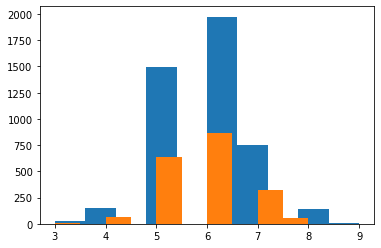

In [148]:
plt.hist(Y_train)
plt.hist(Y_test)
None

Ну норм разбило данные в принципе классы в трейне у нас все есть, причем в том нормальном количестве, будем обучать

In [190]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

In [151]:
criterion = ["gini", "entropy"]
max_depth = [5,10,20,30,50]
min_samples_split = [2,5,8]
grid_params = {"criterion":criterion,"max_depth":max_depth,"min_samples_split":min_samples_split}

In [227]:
def sc(y_true,y_pred):
    roc_auc = roc_auc_score(y_true,y_pred,multi_class='ovr')
    return roc_auc
    

In [228]:
score = make_scorer(sc)

In [231]:
gridCV = GridSearchCV(DTC(),grid_params,error_score='raise',cv=5,refit=True,n_jobs=-1)

In [232]:
gridCV.fit(data[features],data[target])
None

In [215]:
y_pred = gridCV.best_estimator_.predict_proba(X_test)

In [218]:
roc_auc_score(Y_test,y_pred,multi_class="ovr")

0.7696521974718635

In [236]:
n_neighbors = [5,8,10,15,20,30]
metric = ["euclidean","minkowski","chebyshev","manhattan"]
leaf_size = [18,23,30,35,39,40,50]
grid_params = {"n_neighbors":n_neighbors,"metric":metric,"leaf_size":leaf_size}

In [237]:
gridCV = GridSearchCV(KNN(),grid_params,error_score='raise',cv=5,refit=True,n_jobs=-1)

In [238]:
gridCV.fit(data[features],data[target])

GridSearchCV(cv=5, error_score='raise',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [18, 23, 30, 35, 39, 40, 50],
                         'metric': ['euclidean', 'minkowski', 'chebyshev',
                                    'manhattan'],
                         'n_neighbors': [5, 8, 10, 15, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [239]:
y_pred = gridCV.best_estimator_.predict_proba(X_test)
roc_auc_score(Y_test,y_pred,multi_class="ovr")

0.8602177441458556

In [240]:
gridCV.best_params_

{'leaf_size': 18, 'metric': 'manhattan', 'n_neighbors': 30}

Замечаем, что малое количество размера листьев нам помогло, попробуем его еще больше уменьшить

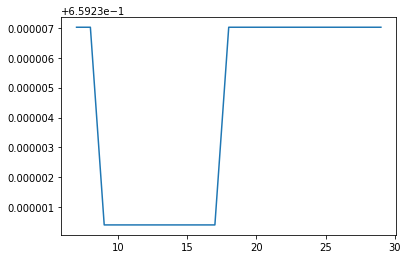

In [274]:

sizes = list(range(7,30))
metrics=[]
for size in sizes:
    clf=KNN(leaf_size= size, metric= 'manhattan', n_neighbors= 30)
    clf.fit(X_train,Y_train)
    y_pred = clf.predict_proba(X_test)
    roc = roc_auc_score(Y_test,y_pred,multi_class='ovr')
    metrics.append(roc)
plt.plot(sizes,metrics)
None

In [276]:
max(metrics)

0.6592370213606996

На данный момент наилучшую метрику выдает KNN с параметрами {'leaf_size': 18, 'metric': 'manhattan', 'n_neighbors': 30}
у которого roc = 0.8602177441458556